# Simple Linear Regression Ordinary Least Squares Methodologies with Python

Goodness of Fit with the Watershed Salt data

In [113]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [114]:
Salt=pd.read_csv('WatershedSalt.csv')
Salt

,Salt_Conc,Roadway_Area
0,3.8,0.19
1,5.9,0.15
2,14.1,0.57
3,10.4,0.40
4,14.6,0.70
5,14.5,0.67
6,15.1,0.63
7,11.9,0.47
8,15.5,0.75
9,9.3,0.60


Text(0.2, 30, 'r=0.98,   p-value=<0.0001')

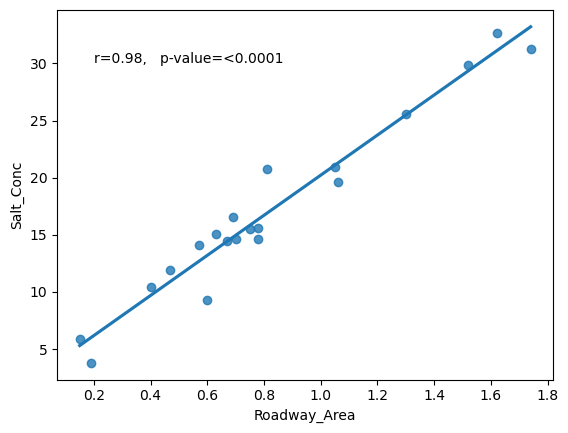

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plotSalt=sns.regplot(x='Roadway_Area',y='Salt_Conc',data=Salt,ci=None)
plotSalt.annotate(text='r=0.98,   p-value=<0.0001',xy=(.2,30),xycoords='data')

In [129]:
from scipy import stats
stats.pearsonr(x=Salt["Roadway_Area"],y=Salt["Salt_Conc"])

PearsonRResult(statistic=0.9754033996529128, pvalue=2.8626350342215114e-13)

In [130]:
Salt.cov()

,Salt_Conc,Roadway_Area
Salt_Conc,62.519237,3.389905
Roadway_Area,3.389905,0.193194


In [131]:
Salt.corr()

,Salt_Conc,Roadway_Area
Salt_Conc,1.000000,0.975403
Roadway_Area,0.975403,1.000000


In [139]:
meanSalt_Conc=(Salt["Salt_Conc"]).mean()
meanRoad_Area=(Salt["Roadway_Area"]).mean()
meanRoad_Area

0.8240000000000001

In [140]:
SSx_Road=sum( ( (Salt["Roadway_Area"]-meanRoad_Area) **2) )

In [141]:
SSx_Road

3.6706800000000004

In [143]:
SSx_Road/(19)

0.19319368421052632

In [144]:
Sxy=(sum ((Salt["Roadway_Area"]-meanRoad_Area) * (Salt["Salt_Conc"]-meanSalt_Conc)))
Sxy

64.40820000000001

In [145]:
Sxy/(19)

3.389905263157895

In [146]:
3.389905263157896/0.19319368421052632

17.54666710255321

In [173]:
Sxy/SSx_Road

17.546667102553204

In [171]:
np.var(Salt["Roadway_Area"],ddof=1)

0.19319368421052632

In [147]:
from statsmodels.formula.api import ols

model1=ols('Salt_Conc~Roadway_Area',data=Salt)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.949   
Dependent Variable: Salt_Conc        AIC:                81.9537 
Date:               2024-07-28 13:13 BIC:                83.9451 
No. Observations:   20               Log-Likelihood:     -38.977 
Df Model:           1                F-statistic:        352.5   
Df Residuals:       18               Prob (F-statistic): 2.86e-13
R-squared:          0.951            Scale:              3.2065  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.6765    0.8680   3.0836  0.0064   0.8529   4.5002
Roadway_Area  17.5467    0.9346  18.7739  0.0000  15.5831  19.5103
-----------------------------------------------------------------
Omnibus:               0.923        Durbin-Watson:          2.153
Prob(Omnibus):        

#Find the regression line

y_fitted = b0 + b1 * X

In this example:

The slope term (b1) = 17.5467.  This is the estimate of the slope of the regression line.  This implies that on average a unit increase in x (Roadway_Area) results in an increase of y (Salt_Conc) of 17.5467 units
* b1  = 17.5467 (mg/L)/%
  
* b1 = $=\frac{\sum\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sum\left(x_i-\bar{x}\right)^2}$
  
* b1 = $\frac{\operatorname{cov}(\mathrm{x}, \mathrm{y})}{\operatorname{var}(x)}$

* b1 =  17.5467 (mg/L)/%

The intercept term (b0) = 2.6765. This is the y-interecpt value, or the value of Salt_Conc when Roadway_Area% = 0. The units are those of y, b0 = 2.6765mg/L
  
y_prediction = 2.6765 + 17.5467 * Roadway_Area

$R^2$ = 0.951

* $R^2$ is the coefficient of detrmination and is the proportion of variation in the dependent variable that is predicted from the independent variables.  It provides a a relative measure of the percentage of the dependent variable variance that the model explains. 

* It is a goodness of the model fit. It can range from 0 to 100%

* The value of 0.951 means that the model (here our one predictor variable) explains 95.1% of the variability in our outcome.  

Scale = 3.2065

* The scale term is the MSE, which was minimized when fitting the line using OLS.  The square root of this MSE is the residual standard error or s(estimate) = sqrt(3.2065) = 1.7907

* It is another goodness of the model fit (also known as standard error of the regression or standard error of the estimate).  It provides the absolute measure of the typical distance that the data points fall from the regression line, and is in units of the dependent variable.  The value of 1.7907 means that, on average, the data points are 1.7907 mg/L away from the regression line.

Do you want a high or a low  $R^2$ ?  A high or a low s(estimate)?

In [148]:
np.sqrt(3.2065)

1.7906702655709676

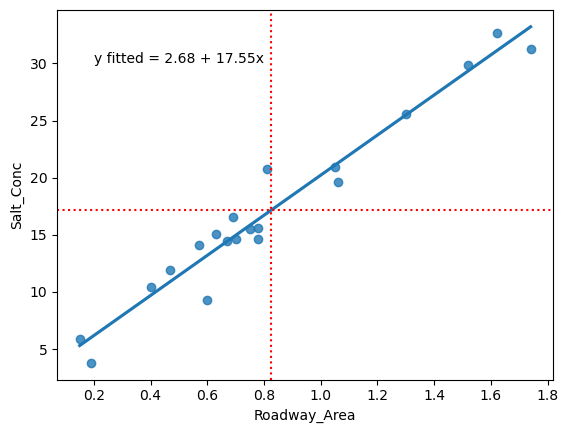

In [149]:
# plot the regression line?
plotSalt=sns.regplot(x='Roadway_Area',y='Salt_Conc',data=Salt,ci=None)
plotSalt.annotate(text='y fitted = 2.68 + 17.55x',xy=(.2,30),xycoords='data')
plotSalt.axvline(x=0.824,c="r",linestyle=":")
plotSalt.axhline(y=17.135,c="r",linestyle=":")

# the ANOVA table for the regression model

In [151]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results1)
print(anova_results)

                df       sum_sq      mean_sq           F        PR(>F)
Roadway_Area   1.0  1130.149244  1130.149244  352.460257  2.862635e-13
Residual      18.0    57.716256     3.206459         NaN           NaN


The ANOVA table keeps track of your sums of squares and decomposes them based on:

SSTotal = SSreg + SSres

$\sum_{i=1}^n\left(y_i-\bar{y}\right)^2=\sum_{i=1}^n\left(\hat{y}_i-\bar{y}\right)^2+\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$

ANOVA decomposes variability into the sum of squares total (SSTotal), the sum of squares regression (SSReg), and the sum of squares error (SSError = SSres). The decomposition of variability helps us understand the sources of variation in our data, assess a model's goodness of fit, and understand the relationship between variables.

$R^2$ = SSReg/(SSTot) = 0.951

MSE = SSRes/dof = 57.7163/18 = 3.2065

s(estimate) = sqrt(MSE) = sqrt(SSRes/dof) = sqrt(57.7163/18) = 1.7907

In [92]:
1130.1492/(1130.1492+57.7163)

0.951411754950371

In [93]:
57.7163/18

3.206461111111111

In [94]:
np.sqrt(57.7163/18)

1.790659406785978

**The sum of the squares of the residual is SSRes.**  It is the sum of the squares of the deviation of the response value from the fitted value. You can show the resiudals using the property of your model regressioon results using the specific names from Python's stats models

In [152]:
np.sum(np.square(results1.resid))

57.716255925332646

In [154]:
# sum of sqaures of the residuals
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
results1.ssr

57.71625592533266

In [155]:
results1.resid

0    -2.210413
1     0.591454
2     1.421853
3     0.704787
4    -0.359213
5     0.067187
6     1.369053
7     0.976520
8    -0.336547
9    -3.904547
10   -0.762947
11    3.910653
12   -1.762947
13    1.816253
14    0.112786
15   -0.200547
16    0.552520
17   -1.676013
18   -1.907747
19    1.597853
dtype: float64

In [156]:
results1.fittedvalues

0      6.010413
1      5.308546
2     12.678147
3      9.695213
4     14.959213
5     14.432813
6     13.730947
7     10.923480
8     15.836547
9     13.204547
10    16.362947
11    16.889347
12    16.362947
13    14.783747
14    25.487214
15    21.100547
16    29.347480
17    21.276013
18    33.207747
19    31.102147
dtype: float64

In [158]:
np.sum(np.square((Salt["Salt_Conc"]-results1.fittedvalues)))

57.716255925332646

**The sum of squares of the regression** is the sum of squares of the deviation of the fitted values from the mean of the response value.

In [159]:
# the explained sum of squares
results1.ess

1130.1492440746674

In [160]:
np.sum(np.square(results1.fittedvalues-np.mean(Salt["Salt_Conc"])))

1130.1492440746667

Text(0, 0.5, 'residuals')

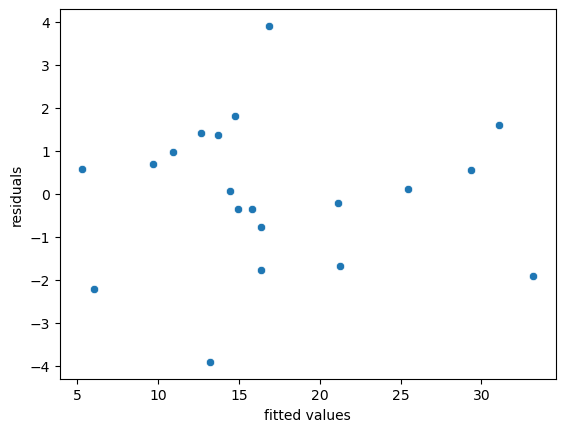

In [161]:
sns.scatterplot(x=results1.fittedvalues,y=results1.resid)
plt.xlabel("fitted values")
plt.ylabel("residuals")

<Axes: xlabel='Roadway_Area', ylabel='Salt_Conc'>

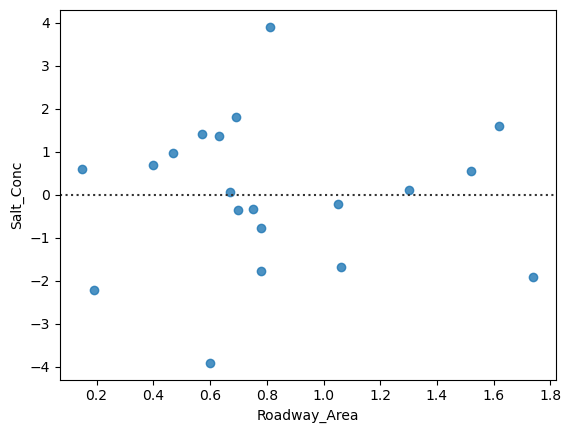

In [162]:
sns.residplot(x='Roadway_Area',y='Salt_Conc',data=Salt)

Text(0, 0.5, 'residuals')

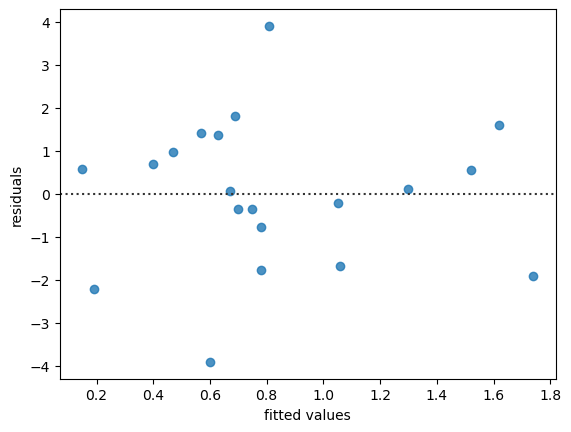

In [108]:
# for SLR the residual vs fitted is the same as the residual vs predictor plot
sns.residplot(x=Salt["Roadway_Area"],y=results1.resid)
plt.xlabel("fitted values")
plt.ylabel("residuals")

C:\Users\carol\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


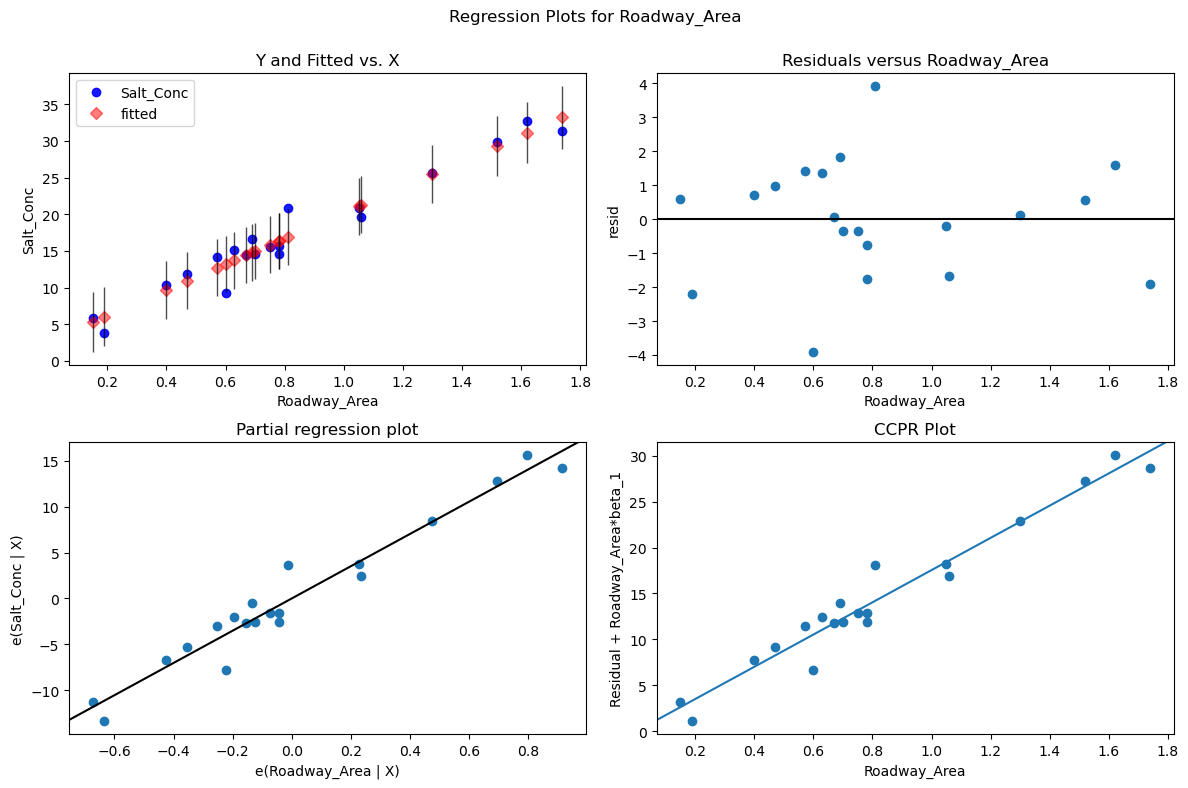

In [163]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'Roadway_Area',fig=fig)

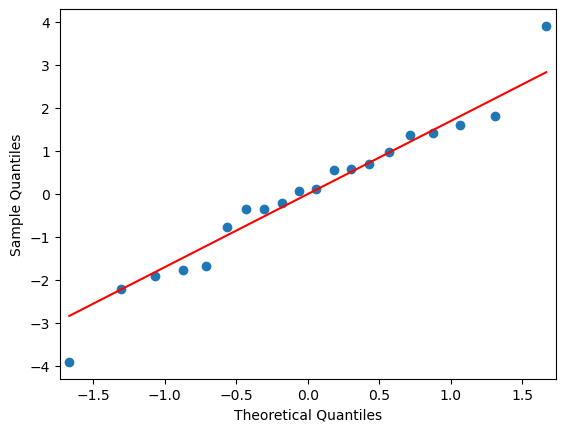

In [164]:
sm.qqplot(results1.resid,line='s')
plt.show()

In [165]:
stats.shapiro(results1.resid)

ShapiroResult(statistic=0.9764649271965027, pvalue=0.8808090090751648)

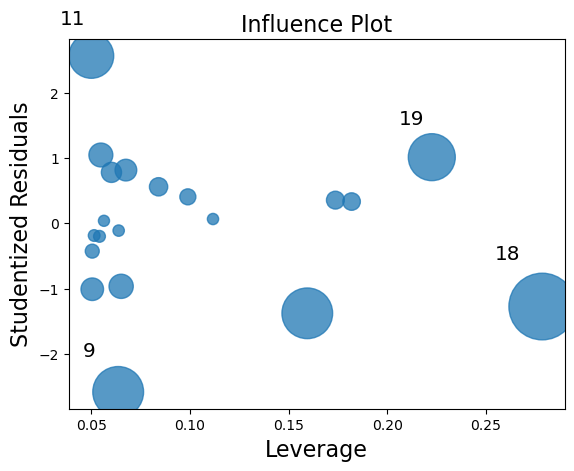

In [166]:
fig=sm.graphics.influence_plot(results1,criterion='cooks')